Task: Analyze Token Transaction Behavior from Simulated Web3 Wallet Data

Objective:
Analyze a dataset of on-chain token transfers to identify wallet behaviors, token usage trends, and total transaction volumes using Pandas and NumPy

 1. Data Preparation
Load the dataset from a CSV or generate 500–1000 random rows using numpy (e.g., random wallets, tokens, amounts).

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

#To load the csv file
dataset = pd.read_csv(r'C:\Users\Muhammad\Blockchain_Assignments\web3_token_transfers.csv')
df = dataset 
dataset

,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd
0,0xaed548b0ad2ad42d36a65fc9fbb7365290273735,0x6f0fa65da6805b547779f78d7ad8e2a1247cd860,UNI,234.63,2024-07-27 03:58:20,78134,3.71
1,0xadebdbe4ffde843c5c0942476dafed98f4081ed2,0xfab70b3d71fab174410d390a80a1377c72a41251,USDC,1505.06,2024-07-14 03:04:09,41491,9.32
2,0xe380d92bab460b09297a542e4b0198e2c87e43c6,0x322edf020491e29d79318e73fb976d1c4bf159e2,WBTC,658.37,2024-07-29 07:29:38,22341,2.63
3,0x262afa887ea89b1b66c12e70d25de9412bdf3ddb,0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3,UNI,456.47,2024-07-20 06:26:24,65623,4.04
4,0x4d87bd4dc83166db001549b0f7dd10ed8172a979,0xaf6bb63813b74b9c62a370447287eb805b11c3ca,WBTC,84.81,2024-07-13 23:07:51,21338,4.60
...,...,...,...,...,...,...,...
995,0x7d321f54337d3b2fe762d2f98cc65a08b33c8167,0x12b225c93d09fbfee50834d34bb976ba2ab744a4,USDC,48.03,2024-07-19 20:23:42,30503,1.63
996,0x99ffd9b436b447f0b75704c666c2e3387468aabc,0xad14eea793cb71aeec4914db1cd51b955768446a,USDC,1246.35,2024-07-06 01:06:21,81703,3.24
997,0xf2476d3a88703c2484581466c841db8ce62c411d,0x8233219c96b703195211f975be60343e130b66a5,WBTC,73.57,2024-07-29 12:05:32,85379,4.28
998,0xb7e4e6b50e93960442a38761471840f4a48cb869,0x199d63a67615ec83d45f91010f6c8206f711b2be,WBTC,1500.25,2024-07-27 03:40:11,78866,9.24


In [93]:
#To Parse the timestamp column as datetime using pd.to_datetime 
df['timestamp'] = pd.to_datetime(df['timestamp'])

df

,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd,net_flow
0,0xaed548b0ad2ad42d36a65fc9fbb7365290273735,0x6f0fa65da6805b547779f78d7ad8e2a1247cd860,UNI,234.63,2024-07-27 03:58:20,78134,3.71,0x6f0fa65da6805b547779f78d7ad8e2a1247cd860
1,0xadebdbe4ffde843c5c0942476dafed98f4081ed2,0xfab70b3d71fab174410d390a80a1377c72a41251,USDC,1505.06,2024-07-14 03:04:09,41491,9.32,0xfab70b3d71fab174410d390a80a1377c72a41251
2,0xe380d92bab460b09297a542e4b0198e2c87e43c6,0x322edf020491e29d79318e73fb976d1c4bf159e2,WBTC,658.37,2024-07-29 07:29:38,22341,2.63,0x322edf020491e29d79318e73fb976d1c4bf159e2
3,0x262afa887ea89b1b66c12e70d25de9412bdf3ddb,0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3,UNI,456.47,2024-07-20 06:26:24,65623,4.04,0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3
4,0x4d87bd4dc83166db001549b0f7dd10ed8172a979,0xaf6bb63813b74b9c62a370447287eb805b11c3ca,WBTC,84.81,2024-07-13 23:07:51,21338,4.60,0xaf6bb63813b74b9c62a370447287eb805b11c3ca
...,...,...,...,...,...,...,...,...
995,0x7d321f54337d3b2fe762d2f98cc65a08b33c8167,0x12b225c93d09fbfee50834d34bb976ba2ab744a4,USDC,48.03,2024-07-19 20:23:42,30503,1.63,0x12b225c93d09fbfee50834d34bb976ba2ab744a4
996,0x99ffd9b436b447f0b75704c666c2e3387468aabc,0xad14eea793cb71aeec4914db1cd51b955768446a,USDC,1246.35,2024-07-06 01:06:21,81703,3.24,0xad14eea793cb71aeec4914db1cd51b955768446a
997,0xf2476d3a88703c2484581466c841db8ce62c411d,0x8233219c96b703195211f975be60343e130b66a5,WBTC,73.57,2024-07-29 12:05:32,85379,4.28,0x8233219c96b703195211f975be60343e130b66a5
998,0xb7e4e6b50e93960442a38761471840f4a48cb869,0x199d63a67615ec83d45f91010f6c8206f711b2be,WBTC,1500.25,2024-07-27 03:40:11,78866,9.24,0x199d63a67615ec83d45f91010f6c8206f711b2be


🔹 2. Basic Exploration (Pandas)
•	Show the top 5 and bottom 5 rows.


•	Count the number of unique wallets (senders and receivers).


•	Count how many transactions each token has.

In [94]:
#Show the top 5 and bottom 5 rows
df.head(5)

,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd,net_flow
0,0xaed548b0ad2ad42d36a65fc9fbb7365290273735,0x6f0fa65da6805b547779f78d7ad8e2a1247cd860,UNI,234.63,2024-07-27 03:58:20,78134,3.71,0x6f0fa65da6805b547779f78d7ad8e2a1247cd860
1,0xadebdbe4ffde843c5c0942476dafed98f4081ed2,0xfab70b3d71fab174410d390a80a1377c72a41251,USDC,1505.06,2024-07-14 03:04:09,41491,9.32,0xfab70b3d71fab174410d390a80a1377c72a41251
2,0xe380d92bab460b09297a542e4b0198e2c87e43c6,0x322edf020491e29d79318e73fb976d1c4bf159e2,WBTC,658.37,2024-07-29 07:29:38,22341,2.63,0x322edf020491e29d79318e73fb976d1c4bf159e2
3,0x262afa887ea89b1b66c12e70d25de9412bdf3ddb,0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3,UNI,456.47,2024-07-20 06:26:24,65623,4.04,0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3
4,0x4d87bd4dc83166db001549b0f7dd10ed8172a979,0xaf6bb63813b74b9c62a370447287eb805b11c3ca,WBTC,84.81,2024-07-13 23:07:51,21338,4.60,0xaf6bb63813b74b9c62a370447287eb805b11c3ca


In [95]:
#Count the number of unique wallets (senders and receivers)
counting = df[['sender_wallet', 'receiver_wallet']].count()
print(counting)
print('')


print('Another method gives us same!')
cnt = df[['sender_wallet', 'receiver_wallet']].notnull().any(axis=1).sum()
print(cnt)

sender_wallet      1000
receiver_wallet    1000
dtype: int64

Another method gives us same!
1000


In [96]:
#Count how many transactions each token has
frequency_of_token = df['token'].value_counts()
print(frequency_of_token)

token
WBTC    214
ETH     203
USDC    200
UNI     194
DAI     189
Name: count, dtype: int64


🔹 3. Wallet Analysis
•	Compute total amount sent and received by each wallet.


•	Identify the top 5 wallets by total amount sent (group + sum + sort).


•	Create a new column: net_flow = received - sent.

In [97]:
#Compute total amount sent and received by wallet
total_amount_sent_received = df['amount'].sum()
print(f'The total amount sent and received is: {total_amount_sent_received}')

The total amount sent and received is: 486253.01


In [98]:
#Compute total amount sent and received by each wallet
total_amount = df.groupby('token')['amount'].sum()
print(total_amount)

print('OR')
WBTC_total_amount = df.loc[df['token'] == 'WBTC', 'amount'].sum()
ETH_total_amount = df.loc[df['token'] == 'ETH', 'amount'].sum()
USDC_total_amount = df.loc[df['token'] == 'USDC', 'amount'].sum()  
UNI_total_amount = df.loc[df['token'] == 'UNI', 'amount'].sum()   
DAI_total_amount = df.loc[df['token'] == 'DAI', 'amount'].sum()

print(f'The total amount for WBTC is: {WBTC_total_amount}')
print(f'The total amount for ETH is: {ETH_total_amount}')
print(f'The total amount for USDC is: {USDC_total_amount}')
print(f'The total amount for UNI is: {UNI_total_amount}')
print(f'The total amount for DAI is: {DAI_total_amount}')

token
DAI      85852.00
ETH     102613.76
UNI      92794.70
USDC    103631.43
WBTC    101361.12
Name: amount, dtype: float64
OR
The total amount for WBTC is: 101361.12000000001
The total amount for ETH is: 102613.76
The total amount for USDC is: 103631.43
The total amount for UNI is: 92794.70000000001
The total amount for DAI is: 85851.99999999999


In [99]:
#Identify the top 5 wallets by total amount sent (group + sum + sort).
sorted_token = df.groupby('token')['amount'].sum().sort_values(ascending = False)

print('This is sorted based on the total amount of each token:')
print(sorted_token)

This is sorted based on the total amount of each token:
token
USDC    103631.43
ETH     102613.76
WBTC    101361.12
UNI      92794.70
DAI      85852.00
Name: amount, dtype: float64


In [ ]:
#Create a new column: net_flow = received - sent
#Creating the received and sent columns
received = np.random.randint(100, 1000, 1000)
sent = np.random.randint(500, 1200, 1000)

#Adding them to the data
df['received'] = received
df['sent'] = sent

#Imputing for the net column
df['net_flow'] = df['received'] - df['sent']

df

,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd,net_flow,day,date,received,sent
0,0xaed548b0ad2ad42d36a65fc9fbb7365290273735,0x6f0fa65da6805b547779f78d7ad8e2a1247cd860,UNI,234.63,2024-07-27 03:58:20,78134,3.71,42,2024-07-27 03:58:20,2024-07-27,707,665
1,0xadebdbe4ffde843c5c0942476dafed98f4081ed2,0xfab70b3d71fab174410d390a80a1377c72a41251,USDC,1505.06,2024-07-14 03:04:09,41491,9.32,-311,2024-07-14 03:04:09,2024-07-14,680,991
2,0xe380d92bab460b09297a542e4b0198e2c87e43c6,0x322edf020491e29d79318e73fb976d1c4bf159e2,WBTC,658.37,2024-07-29 07:29:38,22341,2.63,49,2024-07-29 07:29:38,2024-07-29,773,724
3,0x262afa887ea89b1b66c12e70d25de9412bdf3ddb,0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3,UNI,456.47,2024-07-20 06:26:24,65623,4.04,-501,2024-07-20 06:26:24,2024-07-20,286,787
4,0x4d87bd4dc83166db001549b0f7dd10ed8172a979,0xaf6bb63813b74b9c62a370447287eb805b11c3ca,WBTC,84.81,2024-07-13 23:07:51,21338,4.60,-926,2024-07-13 23:07:51,2024-07-13,126,1052
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0x7d321f54337d3b2fe762d2f98cc65a08b33c8167,0x12b225c93d09fbfee50834d34bb976ba2ab744a4,USDC,48.03,2024-07-19 20:23:42,30503,1.63,-718,2024-07-19 20:23:42,2024-07-19,453,1171
996,0x99ffd9b436b447f0b75704c666c2e3387468aabc,0xad14eea793cb71aeec4914db1cd51b955768446a,USDC,1246.35,2024-07-06 01:06:21,81703,3.24,-384,2024-07-06 01:06:21,2024-07-06,356,740
997,0xf2476d3a88703c2484581466c841db8ce62c411d,0x8233219c96b703195211f975be60343e130b66a5,WBTC,73.57,2024-07-29 12:05:32,85379,4.28,-79,2024-07-29 12:05:32,2024-07-29,447,526
998,0xb7e4e6b50e93960442a38761471840f4a48cb869,0x199d63a67615ec83d45f91010f6c8206f711b2be,WBTC,1500.25,2024-07-27 03:40:11,78866,9.24,-490,2024-07-27 03:40:11,2024-07-27,125,615


🔹 4. Token Analysis
•	Find the average, median, and standard deviation of amount per token (use .agg()).
•	Identify the token with the highest transaction volume (in total amount, not count).
•	Plot a bar chart showing total amount transferred per token using matplotlib.

In [12]:
#Find the average, median, and standard deviation of amount per token (use .agg())
WBTC_mean_amount = df.loc[df['token'] == 'WBTC', 'amount'].mean()
print(f'The mean amount of WBTC is: {WBTC_mean_amount}')
WBTC_median_amount = df.loc[df['token'] == 'WBTC', 'amount'].median()
print(f'The median amount of WBTC is: {WBTC_median_amount}')
WBTC_sd_amount = df.loc[df['token'] == 'WBTC', 'amount'].std()
print(f'The standard deviation amount of WBTC is: {WBTC_sd_amount}')

print('')
ETH_mean_amount = df.loc[df['token'] == 'ETH', 'amount'].mean()
print(f'The mean amount of ETH is: {ETH_mean_amount}')
ETH_median_amount = df.loc[df['token'] == 'ETH', 'amount'].median()
print(f'The median amount of ETH is: {ETH_median_amount}')
ETH_sd_amount = df.loc[df['token'] == 'ETH', 'amount'].std()
print(f'The standard deviation amount of ETH is: {ETH_sd_amount}')

print('')
UNI_mean_amount = df.loc[df['token'] == 'UNI', 'amount'].mean()
print(f'The mean amount of UNI is: {UNI_mean_amount}')
UNI_median_amount = df.loc[df['token'] == 'UNI', 'amount'].median()
print(f'The median amount of UNI is: {UNI_median_amount}')
UNI_sd_amount = df.loc[df['token'] == 'UNI', 'amount'].std()
print(f'The standard deviation amount of UNI is: {UNI_sd_amount}')

print('')
DAI_mean_amount = df.loc[df['token'] == 'DAI', 'amount'].mean()
print(f'The mean amount of DAI is: {DAI_mean_amount}')
DAI_median_amount = df.loc[df['token'] == 'DAI', 'amount'].median()
print(f'The median amount of DAI is: {DAI_median_amount}')
DAI_sd_amount = df.loc[df['token'] == 'DAI', 'amount'].std()
print(f'The standard deviation amount of DAI is: {DAI_sd_amount}')

print('')
USDC_mean_amount = df.loc[df['token'] == 'USDC', 'amount'].mean()
print(f'The mean amount of USDC is: {USDC_mean_amount}')
USDC_median_amount = df.loc[df['token'] == 'USDC', 'amount'].median()
print(f'The median amount of USDC is: {USDC_median_amount}')
USDC_sd_amount = df.loc[df['token'] == 'USDC', 'amount'].std()
print(f'The standard deviation amount of USDC is: {USDC_sd_amount}')

The mean amount of WBTC is: 473.65009345794397
The median amount of WBTC is: 349.24
The standard deviation amount of WBTC is: 443.15818807744614

The mean amount of ETH is: 505.48650246305414
The median amount of ETH is: 365.73
The standard deviation amount of ETH is: 524.4657576974045

The mean amount of UNI is: 478.3231958762887
The median amount of UNI is: 305.365
The standard deviation amount of UNI is: 497.9459065863545

The mean amount of DAI is: 454.24338624338617
The median amount of DAI is: 316.21
The standard deviation amount of DAI is: 456.30947161819074

The mean amount of USDC is: 518.15715
The median amount of USDC is: 367.185
The standard deviation amount of USDC is: 507.70733359813124


In [ ]:
#Identify the token with the highest transaction volume (in total amount, not count)
token_with_highest_volume = df.loc[df['amount'].idxmax()]['token']
print(token_with_highest_volume)
print('')

print('This also works too!')
token_with_highest_volume = df.groupby('token')['amount'].max().idxmax()
print(token_with_highest_volume) 

print('')
#Retrieving it with its value
max_token_amount = df.groupby('token')['amount'].max().sort_values(ascending=False).head(1)
print(max_token_amount) 

ETH

This also works too!
ETH

token
ETH    4086.22
Name: amount, dtype: float64


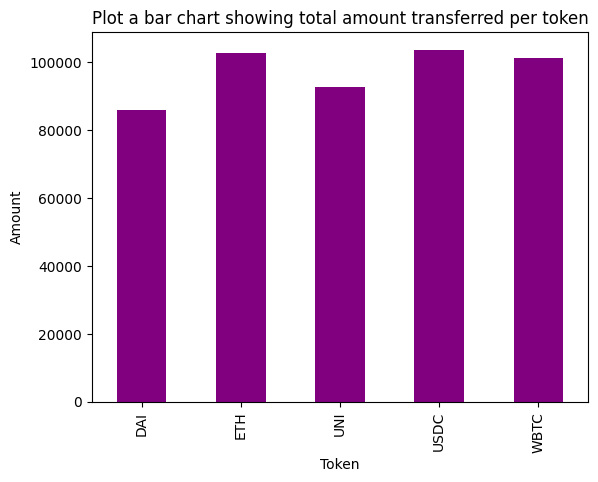

In [64]:
#Plot a bar chart showing total amount transferred per token using matplotlib
#x = df['token'].unique().tolist()
#y = df.groupby('token')['amount'].sum().tolist()
z = df.groupby('token')['amount'].sum()

z.plot(kind='bar', color = 'purple')
plt.title('Plot a bar chart showing total amount transferred per token')
plt.xlabel('Token')
plt.ylabel('Amount')
plt.show()

🔹 5. Time-based Analysis
•	Group data by day (timestamp.dt.date) and compute:
o	Number of transactions per day
o	Total volume per day
o	Average transaction size per day

In [46]:
#To group data by day (timestamp.dt.date)
date_grouping = df['timestamp'].dt.date.unique().tolist()
print(date_grouping)
len(date_grouping)

[datetime.date(2024, 7, 27), datetime.date(2024, 7, 14), datetime.date(2024, 7, 29), datetime.date(2024, 7, 20), datetime.date(2024, 7, 13), datetime.date(2024, 7, 18), datetime.date(2024, 7, 28), datetime.date(2024, 7, 24), datetime.date(2024, 7, 9), datetime.date(2024, 7, 4), datetime.date(2024, 7, 16), datetime.date(2024, 7, 21), datetime.date(2024, 7, 15), datetime.date(2024, 7, 1), datetime.date(2024, 7, 22), datetime.date(2024, 7, 19), datetime.date(2024, 7, 3), datetime.date(2024, 7, 17), datetime.date(2024, 7, 5), datetime.date(2024, 7, 26), datetime.date(2024, 7, 30), datetime.date(2024, 7, 10), datetime.date(2024, 7, 8), datetime.date(2024, 7, 12), datetime.date(2024, 7, 6), datetime.date(2024, 7, 25), datetime.date(2024, 7, 2), datetime.date(2024, 7, 23), datetime.date(2024, 7, 7), datetime.date(2024, 7, 11)]


30

In [56]:
#Number of transactions per day
transaction_per_day = df.groupby(df['timestamp'].dt.date)['gas_used'].count()
transaction_per_day

timestamp
2024-07-01    28
2024-07-02    33
2024-07-03    23
2024-07-04    32
2024-07-05    34
2024-07-06    38
2024-07-07    38
2024-07-08    45
2024-07-09    40
2024-07-10    30
2024-07-11    19
2024-07-12    38
2024-07-13    34
2024-07-14    23
2024-07-15    40
2024-07-16    35
2024-07-17    22
2024-07-18    42
2024-07-19    36
2024-07-20    27
2024-07-21    31
2024-07-22    38
2024-07-23    29
2024-07-24    42
2024-07-25    34
2024-07-26    33
2024-07-27    35
2024-07-28    38
2024-07-29    30
2024-07-30    33
Name: gas_used, dtype: int64

In [57]:
#Total volume per day

Total_volume_per_day = df.groupby(df['timestamp'].dt.date)['amount'].sum()
Total_volume_per_day

timestamp
2024-07-01    11886.22
2024-07-02    16560.16
2024-07-03     8569.60
2024-07-04    18195.10
2024-07-05    13713.53
2024-07-06    16442.27
2024-07-07    17249.47
2024-07-08    20232.45
2024-07-09    15507.76
2024-07-10    11726.21
2024-07-11     8007.63
2024-07-12    14733.03
2024-07-13    15769.48
2024-07-14     8889.57
2024-07-15    22477.65
2024-07-16    16752.26
2024-07-17    15189.27
2024-07-18    21941.33
2024-07-19    15490.56
2024-07-20    14762.93
2024-07-21    19432.29
2024-07-22    21920.08
2024-07-23    16761.70
2024-07-24    21353.10
2024-07-25    16510.29
2024-07-26    11041.07
2024-07-27    19248.91
2024-07-28    22817.58
2024-07-29    14216.92
2024-07-30    18854.59
Name: amount, dtype: float64

In [59]:
#Average transaction size per day
average_transaction_per_day = df.groupby(df['timestamp'].dt.date)['amount'].mean()
average_transaction_per_day

timestamp
2024-07-01    424.507857
2024-07-02    501.823030
2024-07-03    372.591304
2024-07-04    568.596875
2024-07-05    403.339118
2024-07-06    432.691316
2024-07-07    453.933421
2024-07-08    449.610000
2024-07-09    387.694000
2024-07-10    390.873667
2024-07-11    421.454211
2024-07-12    387.711316
2024-07-13    463.808235
2024-07-14    386.503043
2024-07-15    561.941250
2024-07-16    478.636000
2024-07-17    690.421364
2024-07-18    522.412619
2024-07-19    430.293333
2024-07-20    546.775185
2024-07-21    626.848065
2024-07-22    576.844211
2024-07-23    577.989655
2024-07-24    508.407143
2024-07-25    485.596765
2024-07-26    334.577879
2024-07-27    549.968857
2024-07-28    600.462632
2024-07-29    473.897333
2024-07-30    571.351212
Name: amount, dtype: float64

🔹 6. Gas & Fee Analysis (NumPy + Pandas)
•	Use numpy to:
o	Compute total gas used per token
o	Calculate the average fee in USD using NumPy’s np.mean()
•	Identify the top 3 most expensive transactions (based on tx_fee_usd).

In [72]:
#Compute total gas used per token
total_gas_used = df.groupby('token')['gas_used'].sum()
print(total_gas_used)


print('Alternatively, we will get:')


WBTC_total_gas_used = df.loc[df['token'] == 'WBTC', 'gas_used'].sum()
ETH_total_gas_used = df.loc[df['token'] == 'ETH', 'gas_used'].sum()
USDC_total_gas_used = df.loc[df['token'] == 'USDC', 'gas_used'].sum()  
UNI_total_gas_used = df.loc[df['token'] == 'UNI', 'gas_used'].sum()   
DAI_total_gas_used = df.loc[df['token'] == 'DAI', 'gas_used'].sum()

print(f'The total amount for WBTC is: {WBTC_total_gas_used}')
print(f'The total amount for ETH is: {ETH_total_gas_used}')
print(f'The total amount for USDC is: {USDC_total_gas_used}')
print(f'The total amount for UNI is: {UNI_total_gas_used}')
print(f'The total amount for DAI is: {DAI_total_gas_used}')

token
DAI     11918034
ETH     12163737
UNI     12054799
USDC    11967216
WBTC    12930658
Name: gas_used, dtype: int64
Alternatively, we will get:
The total amount for WBTC is: 12930658
The total amount for ETH is: 12163737
The total amount for USDC is: 11967216
The total amount for UNI is: 12054799
The total amount for DAI is: 11918034


In [ ]:
# To calculate the average fee in USD using NumPy’s np.mean()

fee = df['tx_fee_usd']
tax_fee = np.array(fee) #to get it in array so as to allow the use of numpy for the average
average_fee = np.mean(tax_fee)
print(f'The average tax fee is: {average_fee}')

The average tax fee is: 5.24938


In [80]:
#To identify the top 3 most expensive transactions (based on tx_fee_usd)

Top_3_token_tx_fee = df.groupby('token')['tx_fee_usd'].max().sort_values(ascending=False).head(3)
Top_3_token_tx_fee

token
DAI    9.98
ETH    9.98
UNI    9.97
Name: tx_fee_usd, dtype: float64

🔹 7. Advanced Challenges
•	Create a pivot table: Rows = Token, Columns = Day, Values = Total amount transferred
•	Use apply() to tag transactions as:
o	low if amount < 100
o	medium if 100 <= amount <= 1000
o	high if amount > 1000
•	Use np.where() to create a binary feature: is_large_tx (1 if amount > 1000, else 0)

In [137]:
#Creating the pivot table
#To retrieve the dates only from the datetimes
df['day'] = pd.to_datetime(df['timestamp'])
df['date'] = df['day'].dt.date #including the dates as a seperate column

#finally creating the pivot table with it
pivot_table = pd.pivot_table(df, index = 'token', columns='date', values = 'amount', aggfunc='sum')
print(pivot_table)

#pivot_table.to_csv('pivot.csv')

date   2024-07-01  2024-07-02  2024-07-03  2024-07-04  2024-07-05  2024-07-06  \
token                                                                           
DAI        981.03     3293.77     1098.44     1429.71     2150.39     4961.15   
ETH       4437.94     3387.59     2179.93     2631.23     2163.15     1396.71   
UNI       1365.56     3226.33     1139.66     4812.17     3343.93     2662.74   
USDC      3315.54     4156.94     2153.10     5980.24     4019.92     3759.70   
WBTC      1786.15     2495.53     1998.47     3341.75     2036.14     3661.97   

date   2024-07-07  2024-07-08  2024-07-09  2024-07-10  ...  2024-07-21  \
token                                                  ...               
DAI       1459.46     2778.56     5690.08     2873.41  ...     4683.88   
ETH       5213.51     7382.79     1054.12     4103.09  ...     1324.07   
UNI       2526.87     4525.55     2530.37      240.37  ...     1186.67   
USDC      4501.74     1489.73     2647.31     3573.40  ...    

In [144]:
''' Using the apply() to tag transactions as:
o	low if amount < 100
o	medium if 100 <= amount <= 1000 and
o	high if amount > 1000'''

pivot = pivot_table.copy()
pivot_tagged = pivot.applymap(lambda x: 'low' if x < 100 else 'medium' if 100 <= x <= 1000 else 'high' if x > 1000 else None)


print(pivot_tagged)

date  2024-07-01 2024-07-02 2024-07-03 2024-07-04 2024-07-05 2024-07-06  \
token                                                                     
DAI       medium       high       high       high       high       high   
ETH         high       high       high       high       high       high   
UNI         high       high       high       high       high       high   
USDC        high       high       high       high       high       high   
WBTC        high       high       high       high       high       high   

date  2024-07-07 2024-07-08 2024-07-09 2024-07-10  ... 2024-07-21 2024-07-22  \
token                                              ...                         
DAI         high       high       high       high  ...       high       high   
ETH         high       high       high       high  ...       high       high   
UNI         high       high       high     medium  ...       high       high   
USDC        high       high       high       high  ...       high       hi

C:\Users\Muhammad\AppData\Local\Temp\ipykernel_16188\2444646867.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_tagged = pivot.applymap(lambda x: 'low' if x < 100 else 'medium' if 100 <= x <= 1000 else 'high' if x > 1000 else None)


In [146]:
#Using np.where() to create a binary feature: is_large_tx (1 if amount > 1000, else 0)

binary_feature = np.where(pivot > 1000, 1, np.where(pivot < 1000, 0, 0))
#binary_feature = np.where(pivot > 1000, 1, 0)
print(binary_feature)

[[0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]]


🔹 8. Bonus (Optional)
•	Merge two datasets: one for transfers and one for token prices (mock or real)
•	Add a column for amount_usd = amount * token_price
•	Recalculate top tokens by USD volume

In [ ]:
datasets = df['']